In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Input, Flatten, Activation
import random

In [6]:
data = tf.keras.datasets.cifar10

In [8]:
(X_train, y_train), (X_test, y_test) = data.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_test.shape

(10000, 1)

In [13]:
labels = '''airplane,
automobile, 
bird,
cat,
deer,
dog,
frog,
horse,
ship,
truck'''.split()

frog,


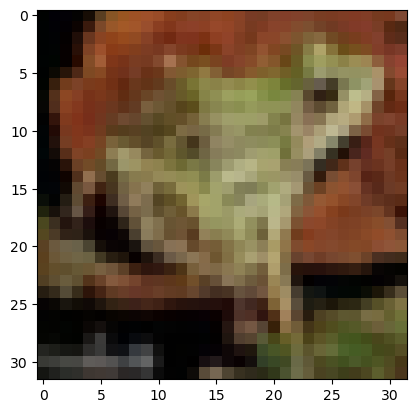

In [21]:
idx = random.randint(0, len(X_train)-1)
plt.imshow(X_train[idx])
print(labels[y_train[idx][0]])

In [22]:
X_train_std = X_train/255.0
X_test_std = X_test/255.0

In [23]:
y_train = y_train.flatten()
y_test = y_test.flatten()

### Sequential Model

In [49]:
model = Sequential([
    Conv2D(32, (3,3), use_bias=False, input_shape=(32,32,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3,3), use_bias=False, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), use_bias=False, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3,3), use_bias=False, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    MaxPooling2D((2,2)),
    
    Flatten(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(len(labels), activation='softmax')
])

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
sq_model = model.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3736 - loss: 1.8582 - val_accuracy: 0.4419 - val_loss: 1.7020
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5995 - loss: 1.1149 - val_accuracy: 0.5255 - val_loss: 1.3959
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.6700 - loss: 0.9348 - val_accuracy: 0.7185 - val_loss: 0.7989
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.7024 - loss: 0.8403 - val_accuracy: 0.6404 - val_loss: 1.0653
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.7310 - loss: 0.7703 - val_accuracy: 0.7080 - val_loss: 0.8473


In [53]:
sq_model.history

{'accuracy': [0.4616599977016449,
  0.6180999875068665,
  0.676639974117279,
  0.7069600224494934,
  0.7320200204849243],
 'loss': [1.5036492347717285,
  1.0716809034347534,
  0.9197897911071777,
  0.835515022277832,
  0.7636578679084778],
 'val_accuracy': [0.44190001487731934,
  0.5254999995231628,
  0.718500018119812,
  0.6403999924659729,
  0.7080000042915344],
 'val_loss': [1.7019740343093872,
  1.395850658416748,
  0.7988649010658264,
  1.0653306245803833,
  0.8473337888717651]}

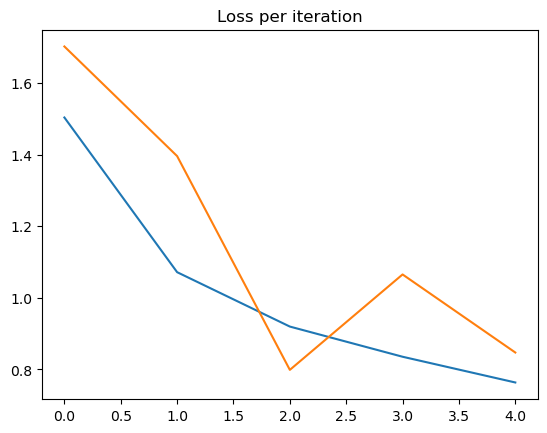

In [54]:
plt.title("Loss per iteration")
plt.plot(sq_model.history['loss'])
plt.plot(sq_model.history['val_loss'])

In [55]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,351,872 (12.79 MB)

 Trainable params: 1,117,162 (4.26 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 2,234,326 (8.52 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
horse,


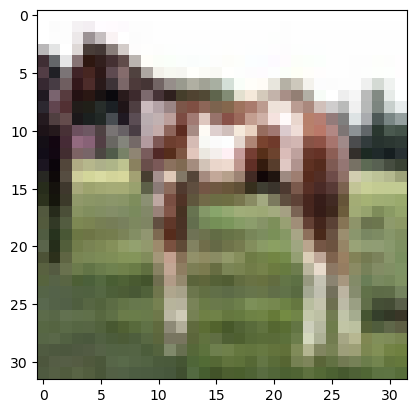

In [56]:
predicted_index = random.randint(0, len(X_test)-1)
plt.imshow(X_test[predicted_index])
pred = model.predict(X_test_std[predicted_index].reshape(1,32,32,3))
print(labels[np.argmax(pred)])

### Functional

In [57]:
X_train_std.shape

(50000, 32, 32, 3)

In [59]:
i = Input(shape=(32,32,3))
x = Conv2D(32, (3,3), use_bias=False, padding='same')(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(2,2)(x)

x = Conv2D(64, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(2,2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dense(len(labels), activation='softmax')(x)

model2 = Model(i,x)

In [65]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
f_model = model2.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 60ms/step - accuracy: 0.4133 - loss: 1.9977 - val_accuracy: 0.5799 - val_loss: 1.1848
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.6648 - loss: 0.9394 - val_accuracy: 0.6604 - val_loss: 0.9675
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.7299 - loss: 0.7657 - val_accuracy: 0.6804 - val_loss: 0.9920
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.7705 - loss: 0.6489 - val_accuracy: 0.7387 - val_loss: 0.7676
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.7968 - loss: 0.5762 - val_accuracy: 0.7161 - val_loss: 0.8754


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
ship,


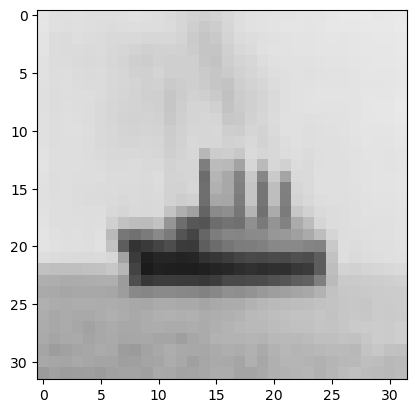

In [67]:
predicted_index = random.randint(0, len(X_test)-1)
plt.imshow(X_test[predicted_index])
pred = model2.predict(X_test_std[predicted_index].reshape(1,32,32,3))
print(labels[np.argmax(pred)])

### VGG16

In [68]:
X_train.shape

(50000, 32, 32, 3)

In [69]:
X_test.shape

(10000, 32, 32, 3)

In [72]:
type(X_train)

numpy.ndarray

In [83]:
def resize_in_batches(X, batch_size=1000):
    resized_batches = []
    for i in range(0, len(X), batch_size):
        batch = X[i:i+batch_size].astype(np.float32)
        batch_tensor = tf.convert_to_tensor(batch)
        resized = tf.image.resize(batch_tensor, [224, 224])
        resized_batches.append(resized.numpy())  # convert back to NumPy to reduce memory load
    return np.concatenate(resized_batches, axis=0)

X_train_resized = resize_in_batches(X_train)

MemoryError: Unable to allocate 574. MiB for an array with shape (1000, 224, 224, 3) and data type float32